# Импорт

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics.pairwise import distance_metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc

from joblib import dump


# Загружаем датасет и разбиваем её на выборку.

In [31]:
data = pd.read_csv('../../Data/DataLaba2/neo_task_smoted.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop('hazardous', axis=1), data['hazardous'], test_size=0.85, random_state=42)
X_train.shape, y_train.shape


((24598, 4), (24598,))

In [3]:
data

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,-0.999187,-0.528599,-0.972789,0.407593,0.0
1,-0.998421,-0.935292,-0.126239,0.290780,0.0
2,-0.997101,-0.534989,0.748307,0.182311,0.0
3,-0.999016,-0.650926,-0.663033,0.374218,0.0
4,-0.992669,-0.430407,0.906601,0.015436,0.0
...,...,...,...,...,...
163987,-0.994367,-0.604209,-0.841236,0.062991,1.0
163988,-0.993778,-0.757087,-0.160396,0.045115,1.0
163989,-0.989685,-0.114495,-0.067884,-0.046048,1.0
163990,-0.986634,-0.067341,0.716200,-0.093033,1.0


# Подбираем гиппер-параметры.

## Для ближайших соседей.

In [4]:
knn_optimal_n_neighbors_by_f1 = RandomizedSearchCV(KNeighborsClassifier(), 
                                             {'n_neighbors': np.arange(1, 10, 2), 
                                              'weights': ['uniform', 'distance'],
                                              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                                              'p': np.arange(1, 10, 1),
                                              'metric': list(distance_metrics().keys())
                                              },
                                              n_iter=12,
                                              n_jobs=4,
                                              scoring='f1',
                                              random_state=71
                                              ).fit(X_train, y_train)
knn_optimal_n_neighbors_by_f1.best_params_

c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py", line 215, in fit
    return self._fit(X, y)
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neigh

{'weights': 'distance',
 'p': 6,
 'n_neighbors': 3,
 'metric': 'l1',
 'algorithm': 'brute'}

In [5]:
knn_optimal_n_neighbors_by_accuracy = RandomizedSearchCV(KNeighborsClassifier(), 
                                             {'n_neighbors': np.arange(1, 10, 2), 
                                              'weights': ['uniform', 'distance'],
                                              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                                              'p': np.arange(1, 10, 1),
                                              'metric': list(distance_metrics().keys())
                                              },
                                              n_iter=12,
                                              n_jobs=4,
                                              scoring='accuracy',
                                              random_state=71
                                              ).fit(X_train, y_train)
knn_optimal_n_neighbors_by_accuracy.best_params_

c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py", line 215, in fit
    return self._fit(X, y)
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neigh

{'weights': 'distance',
 'p': 6,
 'n_neighbors': 3,
 'metric': 'l1',
 'algorithm': 'brute'}

In [6]:
knn_optimal_n_neighbors_by_recall = RandomizedSearchCV(KNeighborsClassifier(), 
                                             {'n_neighbors': np.arange(1, 10, 2), 
                                              'weights': ['uniform', 'distance'],
                                              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                                              'p': np.arange(1, 10, 1),
                                              'metric': list(distance_metrics().keys())
                                              },
                                              n_iter=12,
                                              n_jobs=4,
                                              scoring='recall',
                                              random_state=71
                                              ).fit(X_train, y_train)
knn_optimal_n_neighbors_by_recall.best_params_

c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py", line 215, in fit
    return self._fit(X, y)
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neigh

{'weights': 'distance',
 'p': 2,
 'n_neighbors': 9,
 'metric': 'l1',
 'algorithm': 'ball_tree'}

## Для расфасовщика.

### Создание классификаторов.

In [7]:
knn_recall = KNeighborsClassifier(
    n_neighbors=knn_optimal_n_neighbors_by_recall.best_params_['n_neighbors'] if 'n_neighbors' in knn_optimal_n_neighbors_by_recall.best_params_ else 5,
    algorithm=knn_optimal_n_neighbors_by_recall.best_params_['algorithm'] if 'algorithm' in knn_optimal_n_neighbors_by_recall.best_params_ else 'auto',
    p=knn_optimal_n_neighbors_by_recall.best_params_['p'] if 'p' in knn_optimal_n_neighbors_by_recall.best_params_ else 2,
    weights=knn_optimal_n_neighbors_by_recall.best_params_['weights'] if 'weights' in knn_optimal_n_neighbors_by_recall.best_params_ else 'uniform',
    leaf_size=knn_optimal_n_neighbors_by_recall.best_params_['leaf_size'] if 'leaf_size' in knn_optimal_n_neighbors_by_recall.best_params_ else 30,
    metric=knn_optimal_n_neighbors_by_recall.best_params_['metric'] if 'n_neighbors' in knn_optimal_n_neighbors_by_recall.best_params_ else 'minkowski',
    )

In [8]:
knn_accuracy = KNeighborsClassifier(
    n_neighbors=knn_optimal_n_neighbors_by_accuracy.best_params_['n_neighbors'] if 'n_neighbors' in knn_optimal_n_neighbors_by_accuracy.best_params_ else 5,
    algorithm=knn_optimal_n_neighbors_by_accuracy.best_params_['algorithm'] if 'algorithm' in knn_optimal_n_neighbors_by_accuracy.best_params_ else 'auto',
    p=knn_optimal_n_neighbors_by_accuracy.best_params_['p'] if 'p' in knn_optimal_n_neighbors_by_accuracy.best_params_ else 2,
    weights=knn_optimal_n_neighbors_by_accuracy.best_params_['weights'] if 'weights' in knn_optimal_n_neighbors_by_accuracy.best_params_ else 'uniform',
    leaf_size=knn_optimal_n_neighbors_by_accuracy.best_params_['leaf_size'] if 'leaf_size' in knn_optimal_n_neighbors_by_accuracy.best_params_ else 30,
    metric=knn_optimal_n_neighbors_by_accuracy.best_params_['metric'] if 'n_neighbors' in knn_optimal_n_neighbors_by_accuracy.best_params_ else 'minkowski',
    )

In [9]:
knn_f1 = KNeighborsClassifier(
    n_neighbors=knn_optimal_n_neighbors_by_f1.best_params_['n_neighbors'] if 'n_neighbors' in knn_optimal_n_neighbors_by_f1.best_params_ else 5,
    algorithm=knn_optimal_n_neighbors_by_f1.best_params_['algorithm'] if 'algorithm' in knn_optimal_n_neighbors_by_f1.best_params_ else 'auto',
    p=knn_optimal_n_neighbors_by_f1.best_params_['p'] if 'p' in knn_optimal_n_neighbors_by_f1.best_params_ else 2,
    weights=knn_optimal_n_neighbors_by_f1.best_params_['weights'] if 'weights' in knn_optimal_n_neighbors_by_f1.best_params_ else 'uniform',
    leaf_size=knn_optimal_n_neighbors_by_f1.best_params_['leaf_size'] if 'leaf_size' in knn_optimal_n_neighbors_by_f1.best_params_ else 30,
    metric=knn_optimal_n_neighbors_by_f1.best_params_['metric'] if 'n_neighbors' in knn_optimal_n_neighbors_by_f1.best_params_ else 'minkowski',
    )

### Подбор

In [10]:
bagging_classifie_optimall_params = RandomizedSearchCV(BaggingClassifier(), 
                                                          {
                                                            'estimator': [knn_accuracy, knn_f1, knn_recall, GaussianNB()],
                                                            'n_estimators' : np.arange(0, 20),
                                                            'bootstrap': [True, False]
                                                          },
                                                          n_iter=4,
                                                          n_jobs=4,
                                                          scoring='recall',
                                                          random_state=71
                                                          ).fit(X_train, y_train)
bagging_classifie_optimall_params.best_params_

{'n_estimators': 10,
 'estimator': KNeighborsClassifier(algorithm='ball_tree', metric='l1', n_neighbors=9,
                      weights='distance'),
 'bootstrap': False}

# Обучение

In [25]:
bagging_classifier = BaggingClassifier(
    estimator=bagging_classifie_optimall_params.best_params_['estimator'] if 'estimator' in bagging_classifie_optimall_params.best_params_ else None,
    n_estimators=knn_optimal_n_neighbors_by_recall.best_params_['n_estimators'] if 'n_estimators' in knn_optimal_n_neighbors_by_recall.best_params_ else 10,
    bootstrap=knn_optimal_n_neighbors_by_recall.best_params_['bootstrap'] if 'bootstrap' in knn_optimal_n_neighbors_by_recall.best_params_ else True
    )
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=KNeighborsClassifier(algorithm='ball_tree',
                                                 metric='l1', n_neighbors=9,
                                                 weights='distance'))

# Предсказание

In [26]:
predicted_bagging_classifier = bagging_classifier.predict(X_test)
predicted_bagging_classifier

array([1., 0., 1., ..., 0., 1., 0.])

# Оценка

$$\int\phi(x) = \int3x^2 = x^3$$
$$x^3=y$$
$$1-x^3=y$$
$$y=0.5$$
$$x=0.793701$$
***
$$3x^2 \Rightarrow 1$$
***


In [27]:
print('Accuracy')
print(accuracy_score(y_test, predicted_nb_bagging_classifier))

Accuracy
0.9027361292451612


In [28]:
print('Confusion matrix')
print(confusion_matrix(y_test, predicted_nb_bagging_classifier))

Confusion matrix
[[61377  8357]
 [ 5201 64459]]


In [29]:
print('Precision, Recall, F\n', classification_report(y_test, predicted_nb_bagging_classifier))

Precision, Recall, F
               precision    recall  f1-score   support

         0.0       0.92      0.88      0.90     69734
         1.0       0.89      0.93      0.90     69660

    accuracy                           0.90    139394
   macro avg       0.90      0.90      0.90    139394
weighted avg       0.90      0.90      0.90    139394



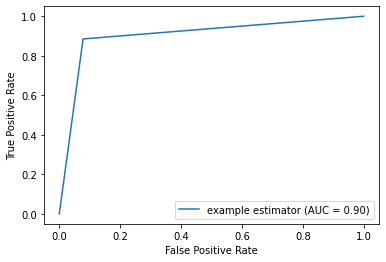

In [30]:
fpr, tpr, thresholds = roc_curve(predicted_nb_bagging_classifier, y_test)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()

## Ближайших соседей.

In [19]:
print('Accuracy')
print(accuracy_score(y_test, predicted_knn_bagging_classifier))

Accuracy
0.9014806950083935


In [20]:
print('Confusion matrix')
print(confusion_matrix(y_test, predicted_knn_bagging_classifier))

Confusion matrix
[[61267  8467]
 [ 5266 64394]]


In [21]:
print('Precision, Recall, F\n', classification_report(y_test, predicted_knn_bagging_classifier))

Precision, Recall, F
               precision    recall  f1-score   support

         0.0       0.92      0.88      0.90     69734
         1.0       0.88      0.92      0.90     69660

    accuracy                           0.90    139394
   macro avg       0.90      0.90      0.90    139394
weighted avg       0.90      0.90      0.90    139394



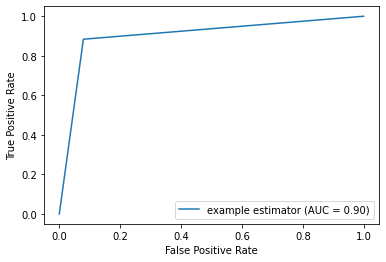

In [22]:
fpr, tpr, thresholds = roc_curve(predicted_knn_bagging_classifier, y_test)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()